In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%run ../../load_magic/environment.py
%pprint
pd.options.display.float_format = '{:20,.2f}'.format
notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

Pretty printing has been turned OFF
C:\Users\dev\Documents\repositories\notebooks\Miscellaneous\ipynb\Internet Speeds.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'csv', 'example_iterrows', 'exit', 'get_column_descriptions', 'get_dir_tree', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'os', 'pd', 'pickle', 'plt', 'quit', 's', 'sm', 'sns', 'stats', 'sys', 'urllib']

In [2]:

tables_url = 'http://xahlee.info/comp/bandwidth.html'

In [3]:

dfs_list = get_page_tables(tables_url)

[(0, (16, 2)), (1, (16, 3))]


In [6]:

from datetime import datetime, date
import re
%matplotlib inline

def fix_year(x):
    x = str(x)
    try:
        year = int(x)
        test_date = date(year, month=1, day=1)
    except:
        date_format = '%Y-%m'
        test_date = datetime.strptime(x, date_format)
    
    return test_date

In [7]:

theory_df = dfs_list[0].copy()
theory_df.columns = ['test_date', 'theoretical_download_speed']
theory_df.test_date = theory_df.test_date.map(fix_year)
theory_df.test_date.map(lambda x: 1.2*1.5**(x.year-1990))

0                    1.20
1                    2.70
2                    6.08
3                   13.67
4                   30.75
5                   69.20
6                  155.70
7                  350.32
8                  788.21
9                1,773.47
10               3,990.31
11               8,978.19
12              20,200.93
13              45,452.10
14             102,267.23
15             230,101.27
Name: test_date, dtype: float64

In [8]:

actual_df = dfs_list[1].copy()

actual_df.Year = actual_df.Year.map(fix_year)
actual_df['download_speed'] = actual_df['Speed download•upload•ping'].map(lambda x: str(x).split('•')[0])
actual_df['upload_speed'] = actual_df['Speed download•upload•ping'].map(lambda x: str(x).split('•')[1])

def g(x):
    ping_list = str(x).split('•')
    if len(ping_list) < 3:
        ping_duration = pd.np.nan
    else:
        ping_duration = ping_list[2]
    
    return ping_duration

actual_df['ping_duration'] = actual_df['Speed download•upload•ping'].map(g)
actual_df.columns = ['test_date', 'Speed download•upload•ping', 'connection_type', 'download_speed',
                     'upload_speed', 'ping_duration']
columns_list = ['test_date', 'download_speed', 'upload_speed', 'ping_duration', 'connection_type']
actual_df = actual_df[columns_list]

speed_regex = re.compile(r'([\d.]+)(k|M)bps')
def f(x):
    speed_value = pd.np.nan
    match_obj = speed_regex.search(x)
    if match_obj:
        speed_value = float(match_obj.group(1))
        korm_str = match_obj.group(2)
        if korm_str == 'M':
            speed_value *= 1000
    
    return speed_value

actual_df.download_speed = actual_df.download_speed.map(f)
actual_df.upload_speed = actual_df.upload_speed.map(f).tolist()

duration_regex = re.compile(r'(\d+)ms')
def g(x):
    duration_value = pd.np.nan
    match_obj = duration_regex.search(str(x))
    if match_obj:
        duration_value = int(match_obj.group(1))
    
    return duration_value

actual_df.ping_duration = actual_df.ping_duration.map(g)
actual_df['theoretical_download_speed'] = actual_df.test_date.map(lambda x: 1.2*1.5**(x.year-1991))
actual_df.set_index('test_date', inplace=True)

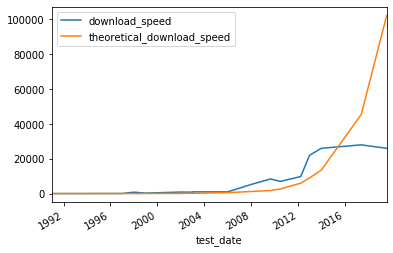

In [9]:

columns_list = ['download_speed', 'theoretical_download_speed']
AxesSubplot_obj = actual_df[columns_list].plot.line()